# Importing Drive

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# Importing Neccesary Libraries

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import random
from collections import defaultdict
from pprint import pprint
from collections import Counter
from nltk.corpus import stopwords
import re
import string
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing import sequence,text
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout,Embedding,LSTM,SpatialDropout1D,Bidirectional
from keras.utils import to_categorical
from nltk.tokenize import word_tokenize
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from keras.preprocessing.sequence import pad_sequences

import warnings
warnings.filterwarnings(action='ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
!pip install WordCloud
from wordcloud import WordCloud

In [4]:
import timeit
import time
start_time = time.time()

# Loading Data

In [5]:
start = timeit.default_timer()
df = pd.read_csv('My Drive/Sos/train.csv',encoding = "ISO-8859-1")

# Visualizing Data

In [6]:
df

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...
...,...,...,...
99984,99996,0,@Cupcake seems like a repeating problem hop...
99985,99997,1,@cupcake__ arrrr we both replied to each other...
99986,99998,0,@CuPcAkE_2120 ya i thought so
99987,99999,1,@Cupcake_Dollie Yes. Yes. I'm glad you had mor...


In [7]:
df.describe()

,ItemID,Sentiment
count,99989.000000,99989.000000
mean,50005.110042,0.564632
std,28865.894393,0.495808
min,1.000000,0.000000
25%,25009.000000,0.000000
50%,50006.000000,1.000000
75%,75003.000000,1.000000
max,100000.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ItemID         99989 non-null  int64 
 1   Sentiment      99989 non-null  int64 
 2   SentimentText  99989 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


Text(0.5, 1.0, 'Bar plot of sentiments')

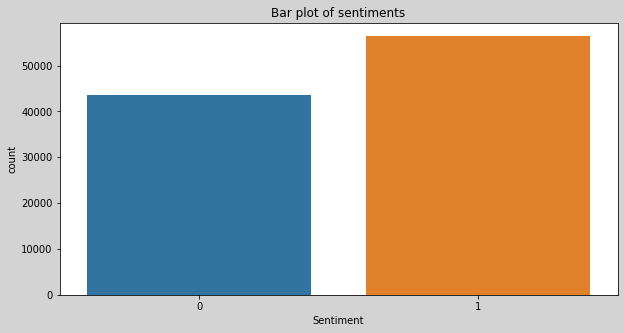

In [9]:
plt.figure(figsize = (10,5),facecolor='lightgrey', edgecolor='red')
sns.countplot(df['Sentiment'])
sns.set(style="darkgrid")
plt.title("Bar plot of sentiments")

# Data Cleaning, Lamentization

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
stop_words= set(stopwords.words('english'))

In [12]:
len(stop_words)

179

In [13]:
def clean_text(txts):
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', txts)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop_words])
#     d
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

In [14]:

clean_tweets = [clean_text(doc) for doc in df['SentimentText']]
sentences = [' '.join(r) for r in clean_tweets] 

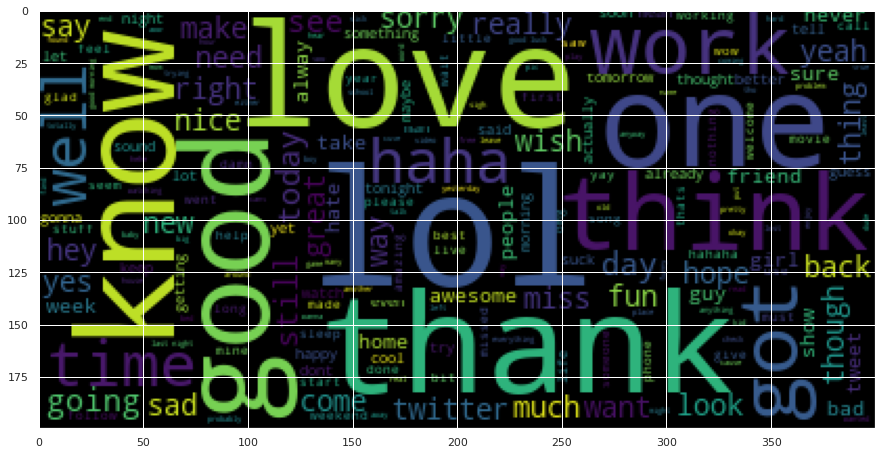

In [15]:
sentences_as_one_string = ' '.join(sentences)
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [16]:
df['cleaned_tweets']=sentences
df['length'] = df['cleaned_tweets'].apply(len)
df.head()

,ItemID,Sentiment,SentimentText,cleaned_tweets,length
0,1,0,is so sad for my APL frie...,sad apl friend,14
1,2,0,I missed the New Moon trail...,missed new moon trailer,23
2,3,1,omg its already 7:30 :O,omg already,11
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga sooo gunna cry dentist since suposed ge...,64
4,5,0,i think mi bf is cheating on me!!! ...,think cheating,14


In [17]:
def top_words(data):
        words_list = data.split(' ')
        counts = Counter(words_list)
        top_words = counts.most_common(20)
        length_of_list = len(top_words)
        index = np.arange(length_of_list)
        print(top_words)
        count_values = [x[1] for x in top_words]
        count_words = [x[0] for x in top_words]
        fig = plt.figure(figsize = (16,9))
        bar_width = 0.4
        rects1 = plt.bar(index, count_values)
        plt.xticks(index + bar_width, count_words, rotation=0)
        plt.show()

Top words in Positive Sentiment
[('good', 4239), ('thanks', 3577), ('love', 3393), ('lol', 3308), ('like', 3157), ('get', 2677), ('know', 2446), ('day', 2092), ('one', 2065), ('well', 2001), ('haha', 1991), ('see', 1885), ('great', 1790), ('time', 1730), ('think', 1589), ('hope', 1552), ('thank', 1489), ('got', 1462), ('yeah', 1306), ('really', 1294)]


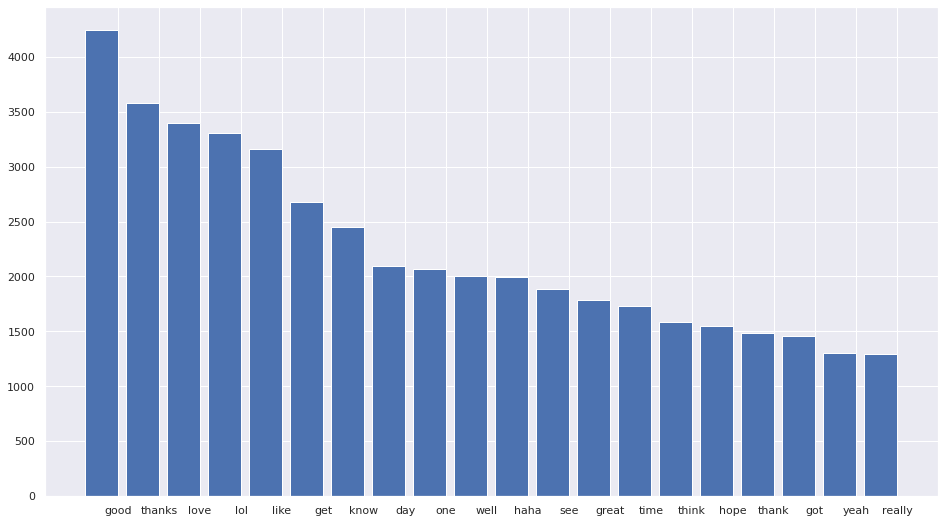

In [18]:
train_positive_sentiment = df[df.Sentiment == 1]
positive_words = ' '.join(train_positive_sentiment['cleaned_tweets'])
print("Top words in Positive Sentiment")
top_words(positive_words)

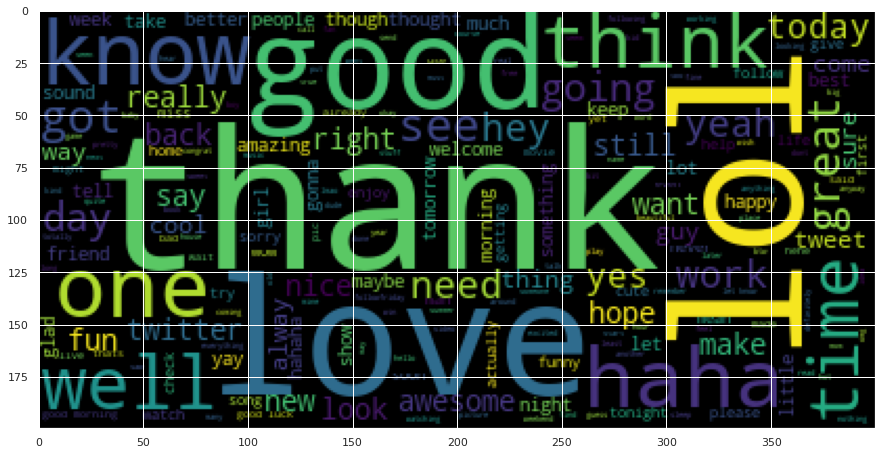

In [19]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(positive_words))

Top words in Negative Sentiment
[('get', 2623), ('like', 2373), ('know', 2160), ('lol', 2084), ('sorry', 2048), ('work', 1676), ('good', 1668), ('one', 1665), ('miss', 1616), ('got', 1562), ('sad', 1501), ('really', 1491), ('still', 1431), ('going', 1417), ('day', 1399), ('want', 1385), ('see', 1369), ('time', 1350), ('think', 1294), ('wish', 1226)]


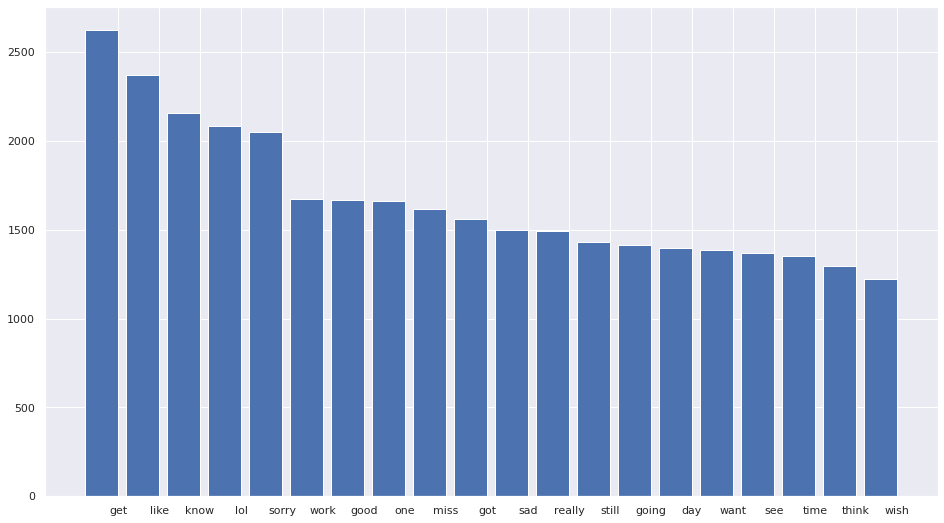

In [20]:
train_positive_sentiment = df[df.Sentiment == 0]
negative_words = ' '.join(train_positive_sentiment['cleaned_tweets'])
print("Top words in Negative Sentiment")
top_words(negative_words)

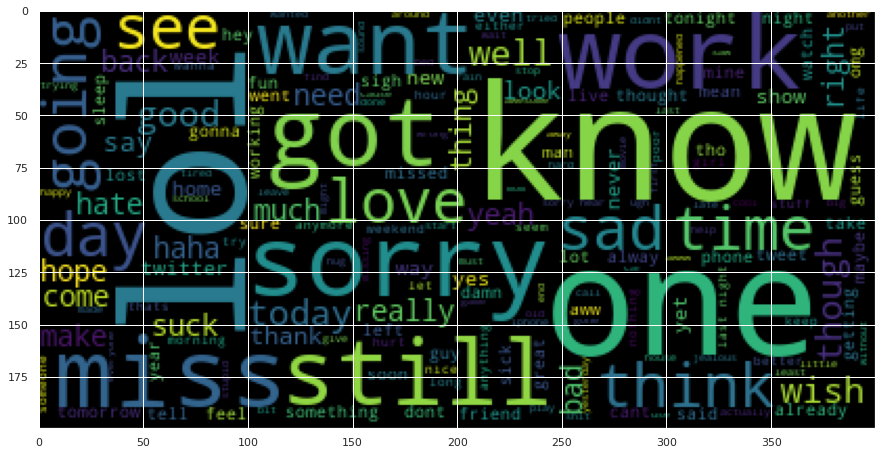

In [21]:
plt.figure(figsize=(15,15))
plt.imshow(WordCloud().generate(negative_words))

### Train Test Split

In [22]:

X = df.cleaned_tweets
y = df.Sentiment

train_X, test_X,train_y, test_y = train_test_split(X, y, test_size=0.2)

In [23]:
X_train, X_val, Y_train, Y_val = train_test_split( train_X, train_y , test_size = 0.2, random_state = 42)

In [24]:
train_X.shape, test_X.shape,train_y.shape, test_y.shape


((79991,), (19998,), (79991,), (19998,))

In [25]:
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((63992,), (15999,), (63992,), (15999,))

# Model building

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
r_len=[]
for text in df['cleaned_tweets']:
    word=word_tokenize(text)
    l=len(word)
    r_len.append(l)
    
MAX_REVIEW_LEN=np.max(r_len)
MAX_REVIEW_LEN

57

In [28]:


max_features = 6000
max_words = 57
batch_size = 128
epochs = 6
num_classes=1

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_val = tokenizer.texts_to_sequences(X_val)

In [29]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_val = sequence.pad_sequences(X_val, maxlen=max_words)
X_test = tokenizer.texts_to_sequences(test_X)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_val.shape,X_test.shape)

(63992, 57) (15999, 57) (19998, 57)


In [30]:
def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')
    
def get_embed_mat(EMBEDDING_FILE, max_features,embed_dim):
    # word vectors
    embeddings_index = dict(get_coefs(*o.rstrip().rsplit(' ')) for o in open(EMBEDDING_FILE, encoding='utf8'))
    print('Found %s word vectors.' % len(embeddings_index))

    # embedding matrix
    word_index = tokenizer.word_index
    num_words = min(max_features, len(word_index) + 1)
    all_embs = np.stack(embeddings_index.values()) #for random init
    embedding_matrix = np.random.normal(all_embs.mean(), all_embs.std(), 
                                        (num_words, embed_dim))
    for word, i in word_index.items():
        if i >= max_features:
            continue
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    max_features = embedding_matrix.shape[0]
    
    return embedding_matrix

In [31]:
EMBEDDING_FILE = 'My Drive/Sos/glove.twitter.27B.25d.txt'
embed_dim = 25 #word vector dim
embedding_matrix = get_embed_mat(EMBEDDING_FILE,max_features,embed_dim)
print(embedding_matrix.shape)

Found 1193515 word vectors.
(6000, 25)


In [32]:
model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X_train.shape[1],weights=[embedding_matrix],trainable=True))
model.add(SpatialDropout1D(0.25))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Bidirectional(LSTM(64,return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 57, 25)            150000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 57, 25)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 57, 256)           157696    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               164352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 472,177
Trainable params: 472,177
Non-trainable params: 0
__________________________________________________

In [33]:
Model= model.fit(X_train, Y_train, validation_data=(X_val, Y_val),epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/6
500/500 [==============================] - 254s 507ms/step - loss: 0.6087 - accuracy: 0.6583 - val_loss: 0.5516 - val_accuracy: 0.7113
Epoch 2/6
500/500 [==============================] - 252s 504ms/step - loss: 0.5439 - accuracy: 0.7187 - val_loss: 0.5315 - val_accuracy: 0.7303
Epoch 3/6
500/500 [==============================] - 256s 512ms/step - loss: 0.5222 - accuracy: 0.7384 - val_loss: 0.5149 - val_accuracy: 0.7397
Epoch 4/6
500/500 [==============================] - 251s 502ms/step - loss: 0.5075 - accuracy: 0.7485 - val_loss: 0.5109 - val_accuracy: 0.7449
Epoch 5/6
500/500 [==============================] - 254s 508ms/step - loss: 0.4987 - accuracy: 0.7530 - val_loss: 0.5081 - val_accuracy: 0.7465
Epoch 6/6
500/500 [==============================] - 251s 502ms/step - loss: 0.4898 - accuracy: 0.7595 - val_loss: 0.5110 - val_accuracy: 0.7440


In [34]:
# 

# Model Performance

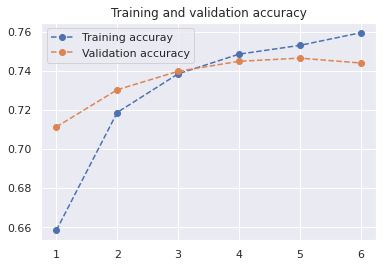

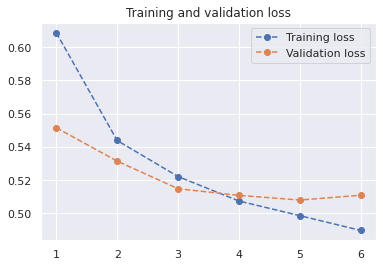

In [35]:
# Plot train/test loss and accuracy
acc = Model.history['accuracy']
val_acc = Model.history['val_accuracy']
loss = Model.history['loss']
val_loss = Model.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, '--o', label='Training accuray')
plt.plot(epochs, val_acc, '--o', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, '--o', label='Training loss')
plt.plot(epochs, val_loss, '--o', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [36]:
prediction = model.predict(X_test)

In [37]:
print("Accuracy of the model : ", accuracy_score(prediction .round(), test_y))
print('F1-score: ', f1_score(prediction .round(), test_y))

Accuracy of the model :  0.746024602460246
F1-score:  0.7893492596740076


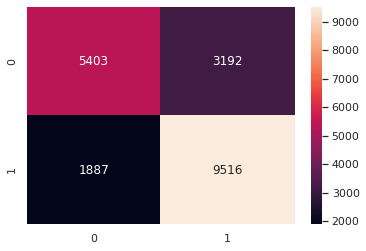

In [38]:
c=confusion_matrix(test_y,prediction .round())
sns.heatmap(c,annot=True,fmt='d')

In [39]:
stop = timeit.default_timer()

print (stop - start)

elapsed_time = time.time() - start_time
print(time.strftime("Time Taken = Hours %H: minuts %M: seconds %S", time.gmtime(elapsed_time)))

1606.7265649560004
Time Taken = Hours 00: minuts 26: seconds 46
